# Concept 


In [44]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

We present a generic framework to model wind power time series..


### ERA5 reanalysis data from ECMWF

Product type:Reanalysis

Variable:100m u-component of wind, 100m v-component of wind, 10m u-component of wind, 10m v-component of wind

Year:2021, 2022, 2023

Month:January, February, March, April, May, June, July, August, September, October, November, December

Day:01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

Time:00:00, 01:00, 02:00, 03:00, 04:00, 05:00, 06:00, 07:00, 08:00, 09:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00

Sub-region extraction:North 55°, West 6°, South 47°, East 15°

Format:NetCDF (experimental)

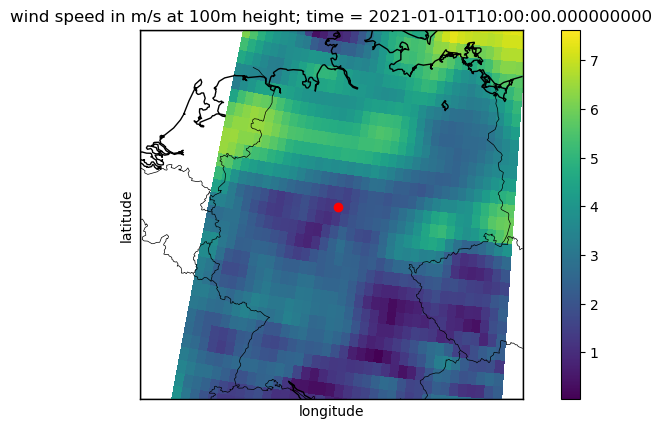

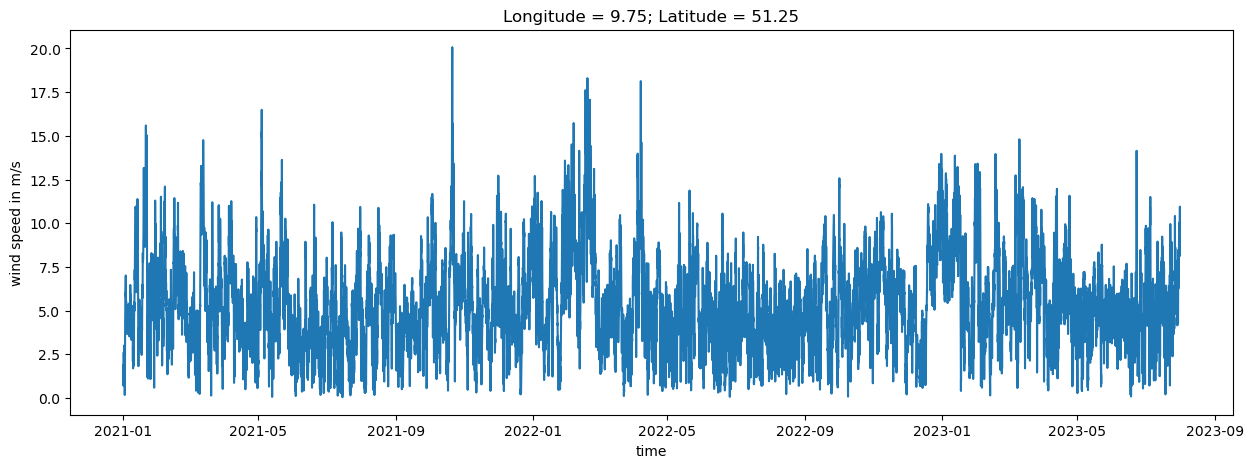

In [66]:
f=xr.open_dataset('C:/Users/Anwender/Documents/GitHub/RiVaPy_development/ERA5_Data_netCDF/adaptor.mars.internal-1698057309.422591-30637-3-8c127153-a2da-4e09-9756-06435d022dfb.nc')


lons = f.variables['longitude'][:]  # longitude
lats = f.variables['latitude'][:]  # latitude
u100 = f.variables['u100'][:,0,:,:] # u-wind at 100m height
v100 = f.variables['v100'][:,0,:,:]  # v-wind at 100m height
u10 = f.variables['u10'][:,0,:,:]  # u-wind at 10m height
v10 = f.variables['v10'][:,0,:,:]  # v-wind at 10m height
time = f.variables['time'][:]

ws100 = np.sqrt(u100*u100+v100*v100)
ws10 = np.sqrt(u10*u10+v10*v10)

m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

#oick location
loc1 = 15

x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])


cs = m.pcolor(xi,yi,np.squeeze(ws100[10,:,:]))

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()


plt.figure(figsize=(15,5))
plt.plot(time[:],ws100[:,loc1,loc1])
sel_lon = np.array(lons[loc1])
sel_lat = np.array(lats[loc1])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.show()


[[-0.05620883+2.75507354j  0.75643263+0.8344315j   1.01370204-0.30690692j
  ...  1.54350326-1.07498937j  0.92655791+0.14607915j
  -0.09342932+1.81878126j]
 [-0.32389866-2.49585348j  1.7779841 -0.40603656j -2.17306165-0.51972418j
  ...  0.70991086+0.53087174j -1.30051805-0.33558691j
   2.06810306+1.35295663j]
 [ 1.36263896+2.27032853j -1.79776481+1.36860183j  0.14049712+2.29389921j
  ... -1.20148659+0.50555862j  0.57664621+2.74619854j
  -0.46865456+0.12206231j]
 ...
 [-0.46865456-0.12206231j  0.57664621-2.74619854j -1.20148659-0.50555862j
  ...  0.14049712-2.29389921j -1.79776481-1.36860183j
   1.36263896-2.27032853j]
 [ 2.06810306-1.35295663j -1.30051805+0.33558691j  0.70991086-0.53087174j
  ... -2.17306165+0.51972418j  1.7779841 +0.40603656j
  -0.32389866+2.49585348j]
 [-0.09342932-1.81878126j  0.92655791-0.14607915j  1.54350326+1.07498937j
  ...  1.01370204+0.30690692j  0.75643263-0.8344315j
  -0.05620883-2.75507354j]]


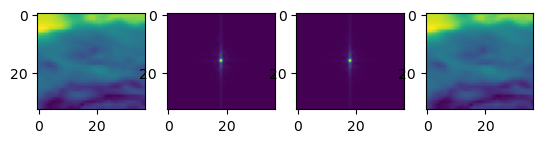

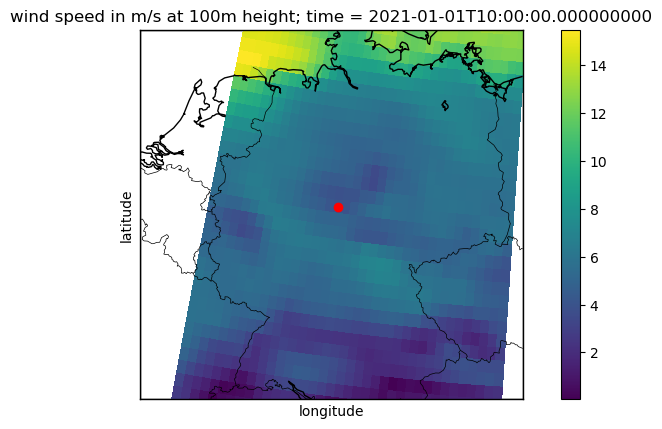

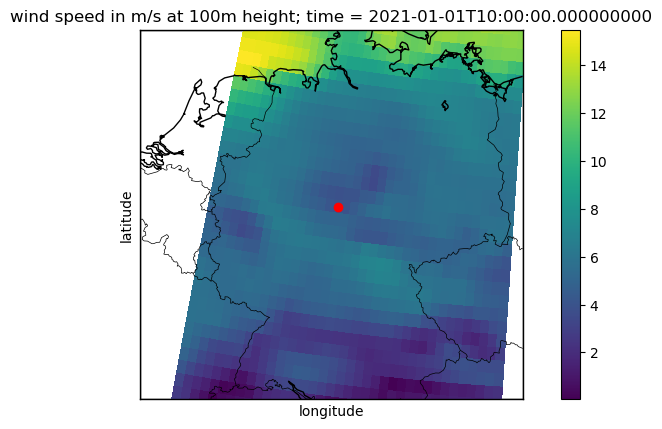

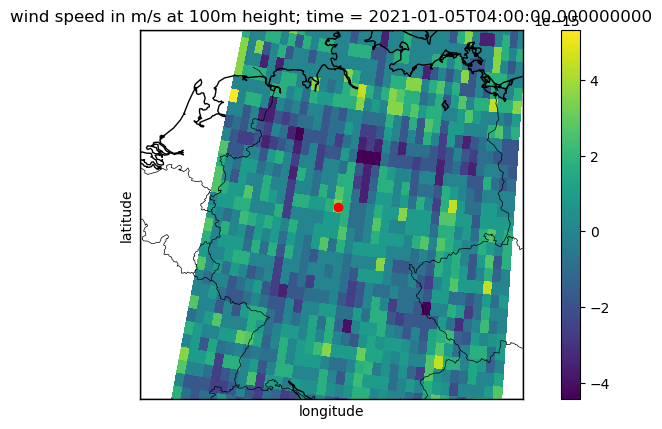

In [46]:
#2D fourier filter
timepoint = 100
grating = np.array(ws100[timepoint,:,:])

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(141)
plt.imshow(grating)
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(142)
plt.imshow(abs(ft))


peak_freq = 1./1000000
filtered_ft = ft.copy()
filtered_ft[np.abs(filtered_ft) < peak_freq] = 0

print(filtered_ft)

plt.subplot(143)
plt.imshow(abs(filtered_ft))

# Calculate the inverse Fourier transform of 
# the Fourier transform
ift = np.fft.ifftshift(filtered_ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part

plt.subplot(144)
plt.imshow(ift)
plt.show()


m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
#oick location
loc1 = 15
x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])
cs = m.pcolor(xi,yi,np.squeeze(grating))
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()

m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
#oick location
loc1 = 15
x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])
cs = m.pcolor(xi,yi,np.squeeze(ift))
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()


m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
#oick location
loc1 = 15
x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])
cs = m.pcolor(xi,yi,np.squeeze(grating -ift))
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[timepoint])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()

### Split wind speed data: v = v_g + v'

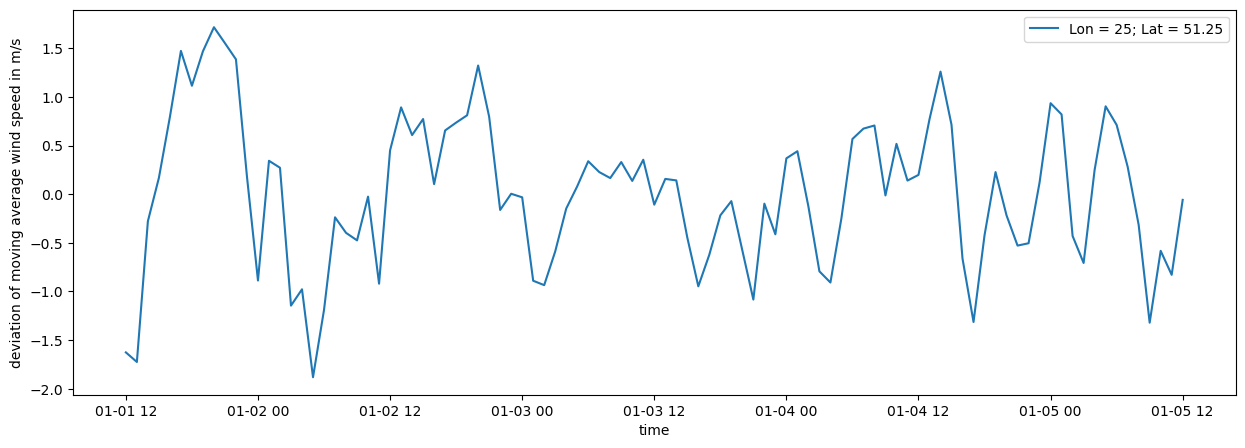

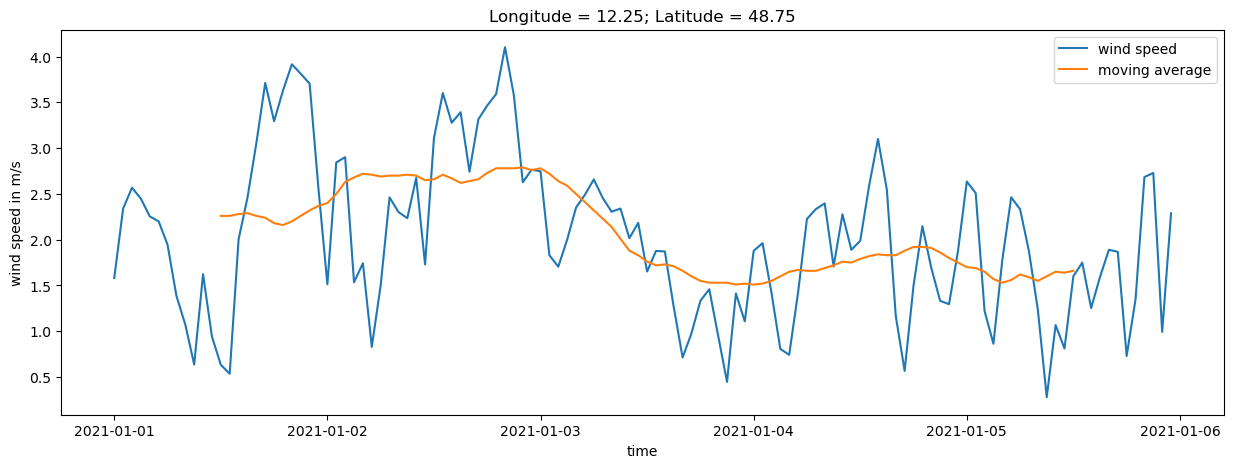

97


In [69]:
plt.figure(figsize=(15,5))
for loc1 in range(25,26):

  t = np.array(time[0:int(24*5)])
  v = np.array(ws100[0:int(24*5),loc1,loc1])

  # moving average over 12h
  window_size = 12
  
  i = window_size 
  v_ma = [] 
  t_ma = []
  v_dev = []
  while i < len(v) - window_size + 1: 
    xx = round(np.sum(v[i-window_size:i+window_size]) / (2*window_size), 2) 
    v_ma.append(xx) 
    t_ma.append(t[i])
    v_dev.append(v[i] - xx) 
      
    i += 1

  plt.plot(t_ma,v_dev,label='Lon = '+str(loc1)+'; Lat = '+str(sel_lat) )
#plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('deviation of moving average wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t,v, label = 'wind speed')
plt.plot(t_ma,v_ma, label = 'moving average')
plt.title('Longitude = '+str(np.array(lons[loc1]))+'; Latitude = '+str(np.array(lats[loc1])))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

print(len(t_ma))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


97


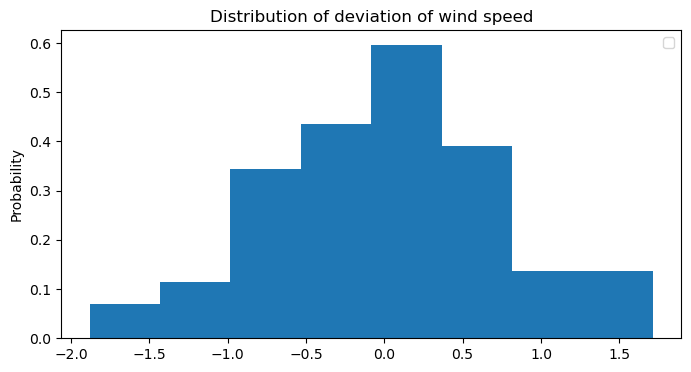

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(v_dev, bins='auto', density=True)
#ax.hist(data, bins=30, density=True, alpha=0.6) 
ax.set_ylabel('Probability')
ax.set_title('Distribution of deviation of wind speed')
ax.legend();


print(len(v_dev))



In [71]:
from ouparams import ouparams
ds = np.array(v_dev)
theta, sigma, kappa = ouparams.find(ds)

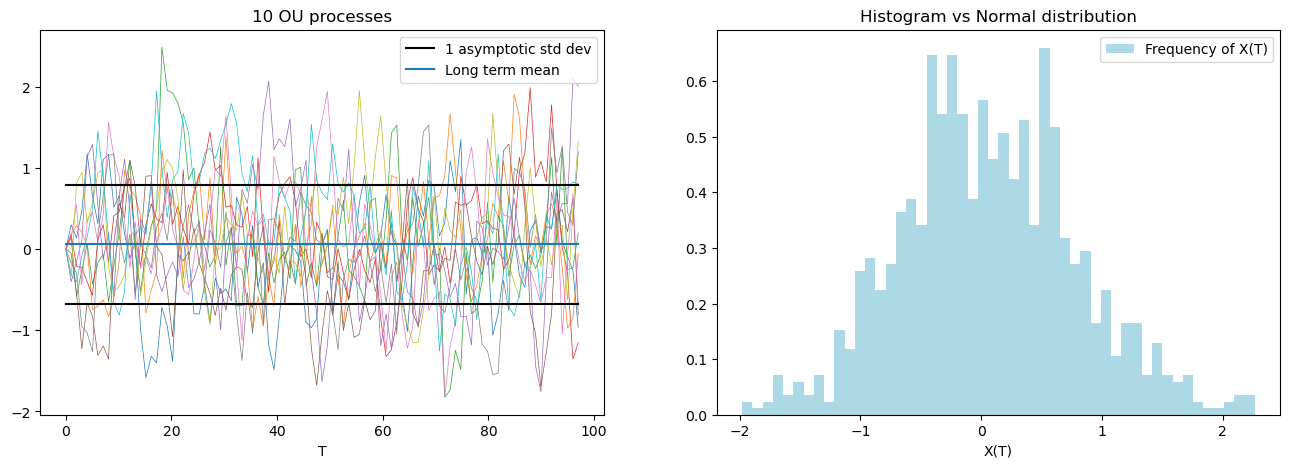

In [72]:
import scipy.stats as ss
np.random.seed(seed=42)

N = 97  # time steps
paths = 1000  # number of paths
Tt = 97
T_vec, dt = np.linspace(0, Tt, N, retstep=True)


std_asy = np.sqrt(sigma**2 / (2 * kappa))  # asymptotic standard deviation

X0 = 0
X = np.zeros((paths, N))
X[:, 0] = X0
W = ss.norm.rvs(loc=0, scale=1, size=(paths, N - 1))

# Uncomment for Euler Maruyama
# for t in range(0,N-1):
#    X[:,t+1] = X[:,t] + kappa*(theta - X[:,t])*dt + sigma * np.sqrt(dt) * W[:,t]

std_dt = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
for t in range(0, N - 1):
    X[:, t + 1] = theta + np.exp(-kappa * dt) * (X[:, t] - theta) + std_dt * W[:, t]

X_T = X[:, -1]  # values of X at time T
X_1 = X[1, :]  # a single path

mean_T = theta + np.exp(-kappa * Tt) * (X0 - theta)
std_T = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * Tt)))


N_processes = 10  # number of processes
x = np.linspace(X_T.min(), X_T.max(), 100)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(T_vec, X[:N_processes, :].T, linewidth=0.5)
ax1.plot(T_vec, (theta + std_asy) * np.ones_like(T_vec), label="1 asymptotic std dev", color="black")
ax1.plot(T_vec, (theta - std_asy) * np.ones_like(T_vec), color="black")
ax1.plot(T_vec, theta * np.ones_like(T_vec), label="Long term mean")
ax1.legend(loc="upper right")
ax1.set_title(f"{N_processes} OU processes")
ax1.set_xlabel("T")
ax2.hist(X_T, density=True, bins=50, facecolor="LightBlue", label="Frequency of X(T)")
ax2.legend()
ax2.set_title("Histogram vs Normal distribution")
ax2.set_xlabel("X(T)")
plt.show()

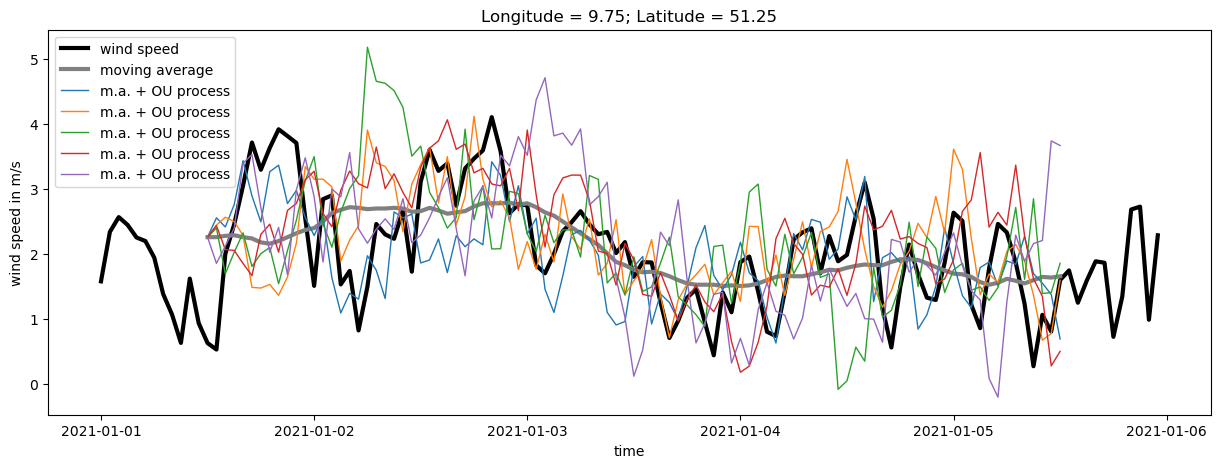

In [73]:
t = np.array(time[0:24*5])

plt.figure(figsize=(15,5))
plt.plot(t,v, label = 'wind speed',color = 'black',linewidth = 3)
plt.plot(t_ma,v_ma, label = 'moving average',color = 'grey',linewidth = 3)
for i in range(0,int(N_processes/2)):
    plt.plot(t_ma,v_ma + X[i, :],label='m.a. + OU process',linewidth = 1)
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

## Split data: v = v_f + v'


<Figure size 1500x500 with 0 Axes>

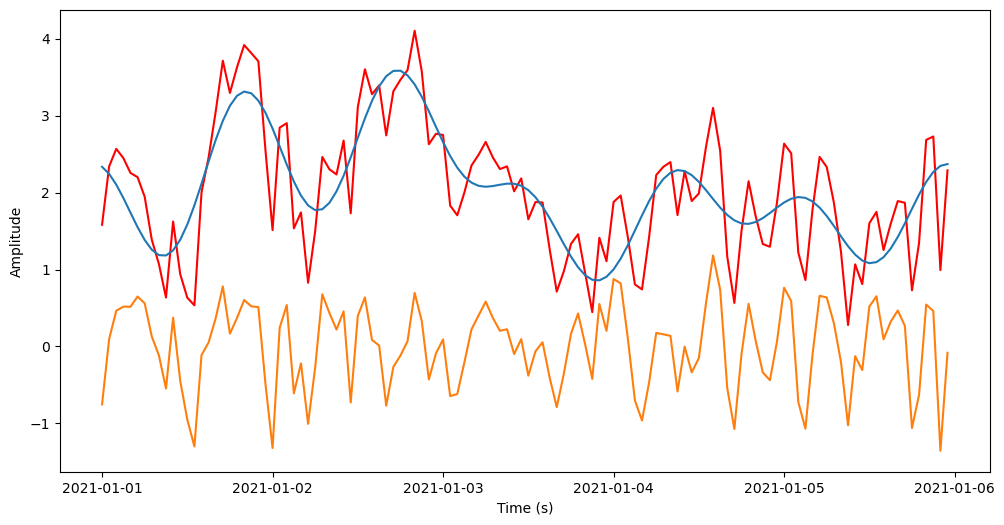

In [77]:
loc1 = 25
plt.figure(figsize=(15,5))
t = np.array(time[0:int(24*5)])
v = np.array(ws100[0:int(24*5),loc1,loc1])

from scipy.fftpack import fftfreq
from numpy.fft import fft, ifft
  

# FFT the signal
sig_fft = fft(v)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(v), d=1./(24*5))

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off] = 0


# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)



# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, v, 'r')
plt.plot(t, filtered)
plt.plot(t,v-filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


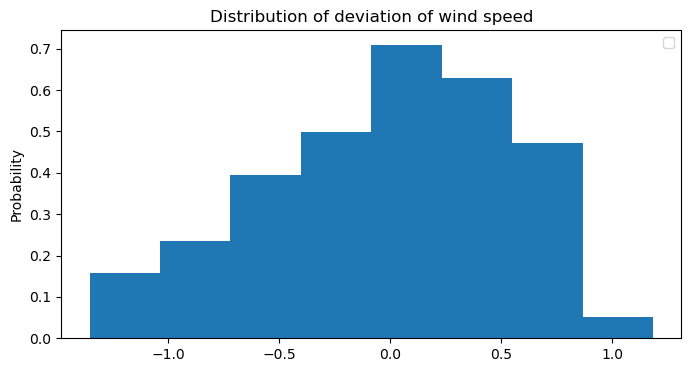

In [78]:
v_dev = (v - filtered).real


fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(v_dev, bins='auto', density=True)
#ax.hist(data, bins=30, density=True, alpha=0.6) 
ax.set_ylabel('Probability')
ax.set_title('Distribution of deviation of wind speed')
ax.legend();

from ouparams import ouparams
ds = np.array(v_dev)
theta, sigma, kappa = ouparams.find(ds)

import scipy.stats as ss
np.random.seed(seed=42)

N = len(filtered.real)  # time steps
paths = 1000  # number of paths
Tt = len(filtered.real)
T_vec, dt = np.linspace(0, Tt, N, retstep=True)


std_asy = np.sqrt(sigma**2 / (2 * kappa))  # asymptotic standard deviation

X0 = 0
X = np.zeros((paths, N))
X[:, 0] = X0
W = ss.norm.rvs(loc=0, scale=1, size=(paths, N - 1))

# Uncomment for Euler Maruyama
# for t in range(0,N-1):
#    X[:,t+1] = X[:,t] + kappa*(theta - X[:,t])*dt + sigma * np.sqrt(dt) * W[:,t]

std_dt = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
for t in range(0, N - 1):
    X[:, t + 1] = theta + np.exp(-kappa * dt) * (X[:, t] - theta) + std_dt * W[:, t]

X_T = X[:, -1]  # values of X at time T
X_1 = X[1, :]  # a single path

mean_T = theta + np.exp(-kappa * Tt) * (X0 - theta)
std_T = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * Tt)))


N_processes = 10  # number of processes
x = np.linspace(X_T.min(), X_T.max(), 100)



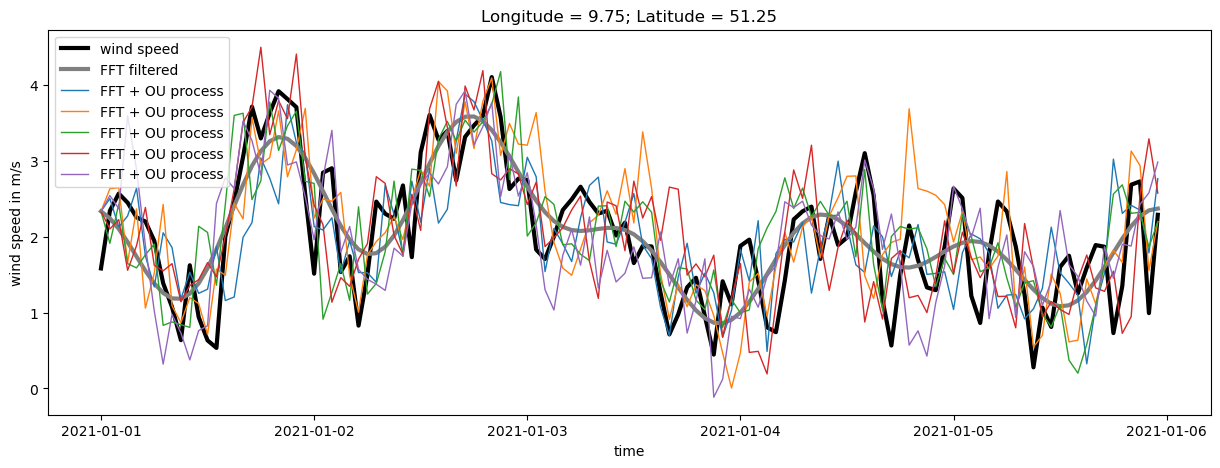

In [79]:

t = np.array(time[0:24*5])

plt.figure(figsize=(15,5))
plt.plot(t,v, label = 'wind speed',color = 'black',linewidth = 3)
plt.plot(t,filtered.real, label = 'FFT filtered',color = 'grey',linewidth = 3)
for i in range(0,int(N_processes/2)):
    plt.plot(t,filtered.real + X[i, :],label='FFT + OU process',linewidth = 1)
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

# Ensemble forecast ECMWF

In [3]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

c:\Users\Anwender\.conda\envs\rivapy\lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.27.0
  warnings.warn(


In [29]:
client = Client(source="ecmwf")

client.retrieve(
    time=0,
    stream="enfo",
    type=['cf', 'pf'],
    param=['10u','10v'],
    step=[21,24],
    target="data.grib2",
)

<multiple>:   0%|          | 0.00/71.1M [00:00<?, ?B/s]

In [30]:
data = ecdata.read("data.grib2")
data.describe('10u')

shortName,10u
name,10 metre U wind component
paramId,165
units,m s**-1
typeOfLevel,heightAboveGround
level,10
date,20231203
time,0
step,"21,24"
number,"0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9"
class,od


In [31]:
u = data.select(shortName='10u', step=24).sort()
v = data.select(shortName='10v', step=24).sort()

speed = ecdata.speed(u,v)
speed.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10si,heightAboveGround,10,20231203,0,24,"0,1,...",207,od,enfo,"cf,pf",0001


In [32]:
mask = ecdata.Fieldset()
for number in range(51):
    speed_n = speed.select(number = number,)
    m = (speed_n > 10) 
    mask.append(m)

prob = (ecdata.mean(mask))*100

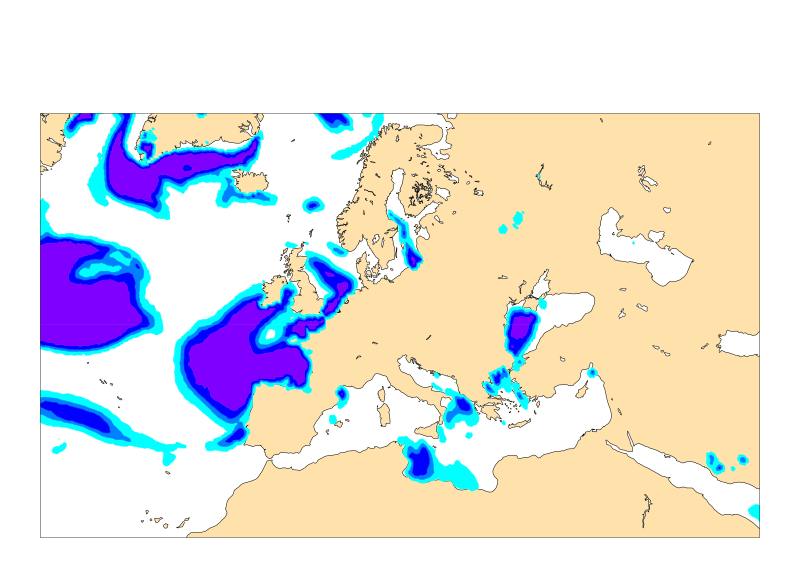

In [34]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")
fig.contour_shaded(prob, style="probability_blue")


fig.show()